In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
class SigmoidNeuron:
    def __init__(self, in_features):
        self.in_features = in_features
        self.W = np.zeros((1, self.in_features))#一个类别
        self.b = 0
        
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, x):
        z = x @ self.W.T + self.b
        return SigmoidNeuron.sigmoid(z)
    
    def evaluate(self, x, y):
        rho = self.predict(x)
        yhat = np.where(rho >= 0.5, 1, 0)
        err = (yhat != y).astype('float').mean()
        return err
    
    def fit(self, X, Y, lr=0.1):
        self.W, self.b = np.zeros((1, self.in_features)), 0
        loss0 = np.Inf
        epsilon = 1e-6
        
        while (True):
            #predict
            rho = self.predict(X)
            
            #loss
            loss = -(np.log(rho[Y==1]).sum() + np.log(1 - (rho[Y==0])).sum()) / X.shape[0] #对数损失函数
            if (np.abs(loss - loss0)) < epsilon:
                break
            loss0 = loss
            
            #error
            e = rho - Y #见对数损失函数的求导推导，ppt里面有
            
            #更新
            n = X.shape[0]
            dw = e.T @ X / n
            db = e.mean()
            
            self.W = self.W - lr * dw
            self.b = self.b - lr * db
            

In [104]:
cell = SigmoidNeuron(5)
print('W = ', cell.W)
print('b = ', cell.b)

x = np.random.randn(10, 5)
a = cell.predict(x)
print(a)

W =  [[0. 0. 0. 0. 0.]]
b =  0
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [105]:
n = 200
x1 = np.random.normal([[1], [1]], 0.8, (2, n))
x0 = np.random.normal([[-1], [-1]], 0.8, (2, n))
x1 = x1.T
x0 = x0.T

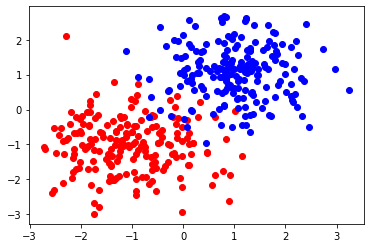

In [106]:
x = np.vstack((x0, x1))
# print(x)
y = np.hstack((np.zeros((n,)), np.ones((n,))))
z = x.T
y = y.reshape(-1, 1)
# print(y)
# plt.scatter(z[0], z[1])
# plt.figure()
plt.scatter(z[0][:n], z[1][:n], color='red')
plt.scatter(z[0][n + 1:], z[1][n + 1:], color='blue')
# plt.show()

In [107]:
lr = SigmoidNeuron(in_features=2)
lr.fit(x, y, lr=1)
err = lr.evaluate(x, y)
print('training error = %.2f%%'%(err * 100))

training error = 3.50%


[[2.89419292 3.10817101]]


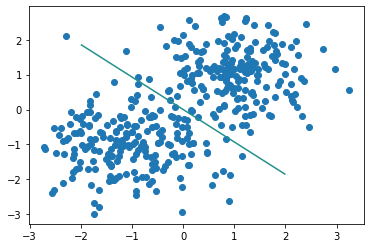

In [108]:
import numpy as np
import matplotlib.pyplot as plt

print(lr.W)
w1, w2 = lr.W.reshape(-1)

x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
x, y = np.meshgrid(x, y)
f = w1 * x + w2 * y
plt.figure()
plt.contour(x, y, f, 0)
plt.scatter(z[0], z[1])
plt.show()